# Santander Data -  Light Gradient Boosting Approach

In this problem, we need to identify which customers will make a specific transaction in the future, 
irrespective of the amount of money transacted.
Training data is an anonymous data set containing 200 numeric feature variables, the binary target column, 
and a string ID_code column and 2,00,000 observations.
Test data includes 200 anonymous numeric variables and a string ID_code column and 2,00,000 observations. 
This is a binary classification problem under supervised machine learning algorithm. The task is to predict
the value of target column in the test set.

In [272]:
#import dependencies
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import seaborn as sns


In [261]:
#Load the train and test dataset
train = pd.read_csv('MATLAB/Intro_ML/santander-customer-transaction-prediction/train.csv')
test = pd.read_csv('MATLAB/Intro_ML/santander-customer-transaction-prediction/test.csv')
train.head()

,Do1,Do2,Do3,Do4,Do5,Do6,Do7,Do8,Do9,Do10,...,Do391,Do392,Do393,Do394,Do395,Do396,Do397,Do398,Do399,Do400
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,3,6,7,3,4,4,3,13,5,2
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,5,4,6,1,1,2,2,13,2,1
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,3,4,3,1,2,2,3,8,2,2
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,1,2,4,4,3,7,4,4,2,2
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,3,4,1,1,1,5,3,6,2,2


In [270]:
np.max(trainPred)

0.998698705032354

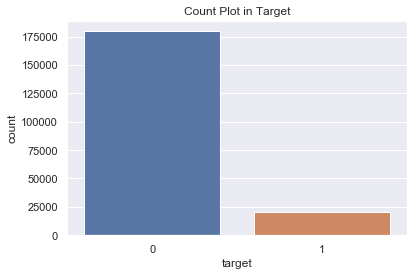

In [119]:
sns.set(style="darkgrid")
sns.countplot(train['target'])
plt.title('Count Plot in Target')
plt.tight_layout()

This shows that the dataset is skewed.

In [59]:
# Separate Variable and Response
X = train.drop(['ID_code','target'],axis = 'columns')
Xtest = test.drop(['ID_code'],axis = 'columns')
y = train['target']

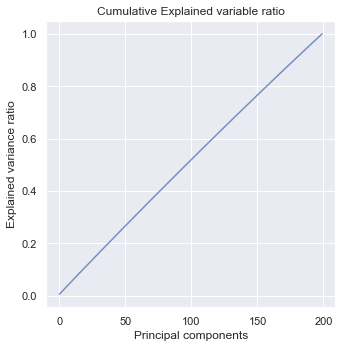

In [121]:
#Standardize and PCA
scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
pca = PCA()
Xtrain_transformed = pca.fit_transform(Xtrain_scaled)
sum(pca.explained_variance_ratio_[1:200])
var_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(5, 5))
plt.plot(range(200), var_ratio, alpha=0.75)
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Cumulative Explained variable ratio')
plt.tight_layout()
    

This dataset has variables that are uncorrelated,PCA cannot be used here for dimensionality reduction.

In [138]:
#Cross-Validation 
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [292]:
#Create dataset for LGBM, and create parameters for LGBM classifier
lgb_dataset = lgb.Dataset(Xtrain, label = ytrain)
#lgb_dataset1 = lgb.Dataset(X, label = y  )
lgbV_dataset = lgb.Dataset(Xvalid, label = yvalid, reference=lgb_dataset)
params = {}
params['learning_rate'] = 0.025
params['objective'] = 'binary'
params['boosting_type'] = 'gbdt'
params['metric'] = 'AUC'
params['max_depth'] = -1
params['feature_fraction'] = 0.04
params['min_data_in_leaf'] = 100
params['num_leaves'] = 8
#params['sub_feature'] = 0.5
#clf = lgb.cv(params,lgb_dataset1,num_boost_round = 10000,nfold=10,early_stopping_rounds=100)
clf = lgb.train(params,lgb_dataset,num_boost_round = 171,valid_sets=lgbV_dataset,early_stopping_rounds=100)


[1]	valid_0's auc: 0.573583
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.614413
[3]	valid_0's auc: 0.645646
[4]	valid_0's auc: 0.665881
[5]	valid_0's auc: 0.670691
[6]	valid_0's auc: 0.686349
[7]	valid_0's auc: 0.704848
[8]	valid_0's auc: 0.707671
[9]	valid_0's auc: 0.712975
[10]	valid_0's auc: 0.714883
[11]	valid_0's auc: 0.721784
[12]	valid_0's auc: 0.724061
[13]	valid_0's auc: 0.732796
[14]	valid_0's auc: 0.738614
[15]	valid_0's auc: 0.746983
[16]	valid_0's auc: 0.756734
[17]	valid_0's auc: 0.762163
[18]	valid_0's auc: 0.765827
[19]	valid_0's auc: 0.766663
[20]	valid_0's auc: 0.764134
[21]	valid_0's auc: 0.763023
[22]	valid_0's auc: 0.77359
[23]	valid_0's auc: 0.775659
[24]	valid_0's auc: 0.773864
[25]	valid_0's auc: 0.777967
[26]	valid_0's auc: 0.781267
[27]	valid_0's auc: 0.780182
[28]	valid_0's auc: 0.779798
[29]	valid_0's auc: 0.78269
[30]	valid_0's auc: 0.787211
[31]	valid_0's auc: 0.788717
[32]	valid_0's auc: 0.791891
[33]	valid_0's auc: 

In [289]:
#Make Predictions on the test dataset
testPred = clf.predict(Xtest)

In [291]:
#Create result.csv
sub = pd.DataFrame()
sub['ID_code'] = test['ID_code']
sub['target'] = testPred
sub.to_csv('result6.csv', index=False)

In [295]:
len(false_positive_rate)

5372

Text(0.5, 0, 'False Positive Rate')

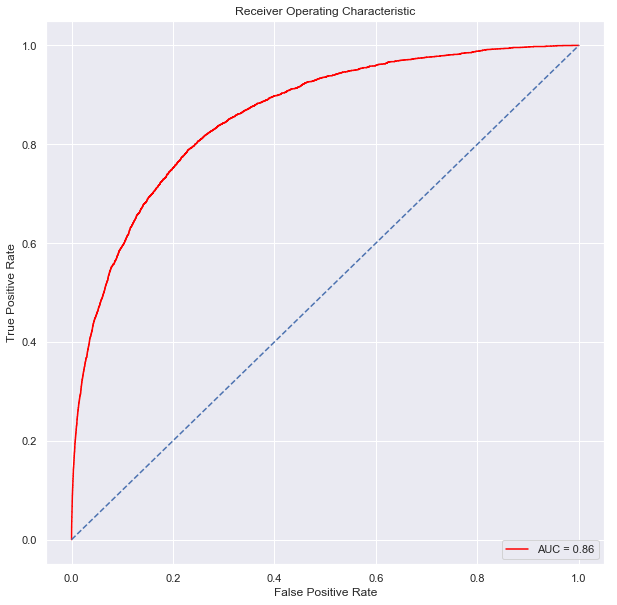

In [293]:
from sklearn.metrics import roc_curve, auc
ypred = clf.predict(Xvalid)
false_positive_rate, true_positive_rate, thresholds = roc_curve(yvalid, ypred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')